In [ ]:
pip install anvil-uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
%matplotlib inline

In [ ]:
# Anvil Uplink Key:
# Z6WZMZZ43E5ZKQ7QDDHHHGY3-EFWSMDYORIFSFZST

import anvil.server
import anvil.media
import anvil.mpl_util
#anvil.server.connect("HWNH2PGX7QD7BPJZMOH6W52N-6LRJ6K5Q6VPRVAKM")


In [ ]:
!unzip final_network.zip

Archive:  final_network.zip
   creating: final_network/
   creating: final_network/variables/
  inflating: final_network/variables/variables.data-00000-of-00001  
  inflating: final_network/variables/variables.index  
  inflating: final_network/keras_metadata.pb  
   creating: final_network/assets/
  inflating: final_network/saved_model.pb  


Called model_run
File Uploaded
1/1 [==============================] - 0s 96ms/step
Predicted Number is: 8
Returned Image


KeyboardInterrupt: ignored

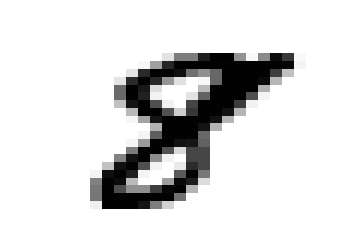

In [ ]:
anvil.server.connect("NYNR7O4KBJTB45RIXBDXD555-RDDQF6NOXBMPYLE7")
@anvil.server.callable
def model_run(file):
  print("Called model_run")
  with anvil.media.TempFile(file) as file_name:

    print("File Uploaded")

    input_file = np.genfromtxt(file_name, delimiter=',')  

    input_arr = input_file.reshape((1,28,28,1))
    result = np.argmax(model.predict(input_arr), axis=1)[0]
    

    print("Predicted Number is:", result)
    plt.pcolor( 1-input_file[::-1], cmap = 'gray')
    plt.axis('off')

    print("Returned Image")
    
    
    
    return str(result), anvil.mpl_util.plot_image()

model = tf.keras.models.load_model('final_network')
anvil.server.wait_forever()

1/1 [==============================] - 0s 70ms/step
8
created fig
plotted
HERE
1/1 [==============================] - 0s 70ms/step
7
created fig
plotted
HERE


KeyboardInterrupt: ignored

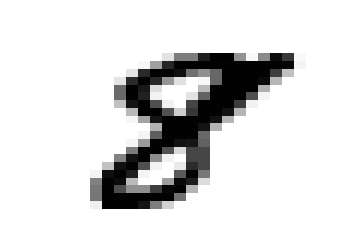

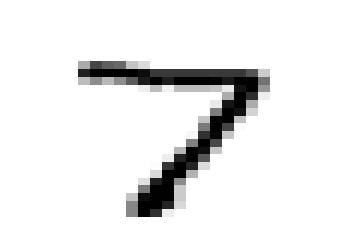

In [ ]:
import pandas as pd
import anvil.media
import anvil.tables as tables
import anvil.tables.query as q
from anvil.tables import app_tables

import anvil.mpl_util



@anvil.server.callable
def model_run(file):

  with anvil.media.TempFile(file) as file_name:


    input_file = np.genfromtxt(file_name, delimiter=',')
    input_arr = input_file.reshape((1,28,28,1))
    model = tf.keras.models.load_model('final_network')
    result = np.argmax(model.predict(input_arr), axis=1)[0]
    print(result)
    fig = plt.figure()
    print("created fig")
    plt.pcolor( 1-input_file[::-1], cmap = 'gray')
    print("plotted")
    plt.axis('off')
    

    print("HERE")

    
    return 'Predicted Number is: {}'.format(result), anvil.mpl_util.plot_image()

anvil.server.wait_forever()

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]


11490434/11490434 [==============================] - 2s 0us/step


In [3]:
x_train = x_train.reshape((ndata_train,28,28,1)) # Add color dim for greyscale...greyscale is one value and not like RGB where there are 3
x_test = x_test.reshape((ndata_test,28,28,1))


xshape = x_train.shape[1:4]



In [8]:
NNmodel2 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.nn.relu,input_shape=xshape),
        tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu,input_shape=xshape),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2),
        tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation=tf.nn.relu,input_shape=xshape),
        tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation=tf.nn.relu,input_shape=xshape),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2),
        tf.keras.layers.Flatten(), # this layer is VERY important between conv and dense!
        tf.keras.layers.Dropout(0.75),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dense(64, activation = "relu"),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
        ])

In [9]:
NNmodel2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NNmodel2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 256)        0         
 2D)                                                  

In [10]:
NNmodel2.fit(x_train,y_train,epochs=25,validation_split=0.2,batch_size=512)

Epoch 1/25
94/94 [==============================] - 5s 45ms/step - loss: 0.4420 - accuracy: 0.8596 - val_loss: 0.0809 - val_accuracy: 0.9747
Epoch 2/25
94/94 [==============================] - 4s 42ms/step - loss: 0.0975 - accuracy: 0.9701 - val_loss: 0.0516 - val_accuracy: 0.9850
Epoch 3/25
94/94 [==============================] - 4s 42ms/step - loss: 0.0660 - accuracy: 0.9798 - val_loss: 0.0428 - val_accuracy: 0.9871
Epoch 4/25
94/94 [==============================] - 4s 42ms/step - loss: 0.0501 - accuracy: 0.9836 - val_loss: 0.0408 - val_accuracy: 0.9867
Epoch 5/25
94/94 [==============================] - 4s 42ms/step - loss: 0.0441 - accuracy: 0.9856 - val_loss: 0.0308 - val_accuracy: 0.9910
Epoch 6/25
94/94 [==============================] - 4s 43ms/step - loss: 0.0388 - accuracy: 0.9876 - val_loss: 0.0306 - val_accuracy: 0.9909
Epoch 7/25
94/94 [==============================] - 4s 43ms/step - loss: 0.0348 - accuracy: 0.9889 - val_loss: 0.0277 - val_accuracy: 0.9917
Epoch 8/25
94

In [11]:
pred_probs2 = NNmodel2.predict(x_test)
pred2 = np.argmax(pred_probs2, axis=1)
print(np.mean(pred2==y_test))

313/313 [==============================] - 1s 2ms/step
0.9953


In [ ]:
NNmodel2.save('network')

In [ ]:
model = tf.keras.models.load_model('network')

In [ ]:
#input_file = pd.read_csv("hw1_test.csv", delimiter=",", dtype=str)
from numpy import genfromtxt
input_file = np.genfromtxt('sample_data.csv', delimiter=',')
input_file = input_file.reshape((1,28,28,1))
print(input_file.shape)
result = np.argmax(NNmodel2.predict(input_file), axis=1)[0]
print(result)

(1, 28, 28, 1)
1/1 [==============================] - 0s 16ms/step
8


In [ ]:
full_train_model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.nn.relu,input_shape=xshape),
        tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu,input_shape=xshape),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2),
        tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation=tf.nn.relu,input_shape=xshape),
        tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation=tf.nn.relu,input_shape=xshape),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2),
        tf.keras.layers.Flatten(), # this layer is VERY important between conv and dense!
        tf.keras.layers.Dropout(0.75),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dense(64, activation = "relu"),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

full_train_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

full_train_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 256)        0         
 2D)                                                  

In [ ]:
full_train_model.fit(x_train,y_train,epochs=25,validation_split=0,batch_size=512)

Epoch 1/25
118/118 [==============================] - 6s 42ms/step - loss: 0.3611 - accuracy: 0.8817
Epoch 2/25
118/118 [==============================] - 5s 39ms/step - loss: 0.0843 - accuracy: 0.9744
Epoch 3/25
118/118 [==============================] - 5s 39ms/step - loss: 0.0580 - accuracy: 0.9810
Epoch 4/25
118/118 [==============================] - 5s 39ms/step - loss: 0.0493 - accuracy: 0.9850
Epoch 5/25
118/118 [==============================] - 5s 40ms/step - loss: 0.0405 - accuracy: 0.9877
Epoch 6/25
118/118 [==============================] - 5s 39ms/step - loss: 0.0373 - accuracy: 0.9878
Epoch 7/25
118/118 [==============================] - 5s 39ms/step - loss: 0.0299 - accuracy: 0.9907
Epoch 8/25
118/118 [==============================] - 5s 39ms/step - loss: 0.0293 - accuracy: 0.9913
Epoch 9/25
118/118 [==============================] - 5s 39ms/step - loss: 0.0258 - accuracy: 0.9918
Epoch 10/25
118/118 [==============================] - 5s 39ms/step - loss: 0.0236 - accura

In [ ]:
pred_probs2 = full_train_model.predict(x_test)
pred2 = np.argmax(pred_probs2, axis=1)
print(np.mean(pred2==y_test))

313/313 [==============================] - 1s 2ms/step
0.9949


In [ ]:
np.where(pred2!=y_test)

(array([ 321,  625,  659,  924,  947, 1014, 1232, 1247, 1260, 1299, 1681,
        1748, 1790, 1901, 2118, 2130, 2135, 2293, 2414, 2462, 2488, 2597,
        2654, 2896, 2927, 2939, 3225, 3422, 3520, 3558, 3762, 4078, 4176,
        4201, 4504, 4699, 4740, 4761, 4823, 5937, 6571, 6576, 6597, 6625,
        6651, 8408, 9638, 9642, 9664, 9729, 9839]),)

Number of misclassifications: 51
Pred: 7
True:  2


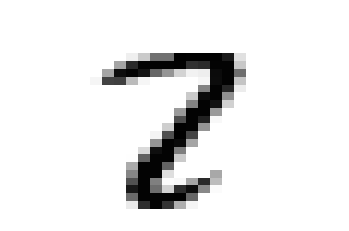

-----
Pred: 4
True:  6


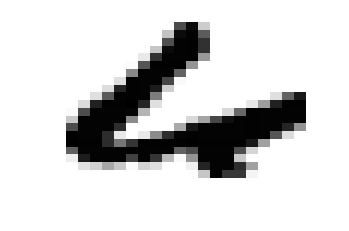

-----
Pred: 7
True:  2


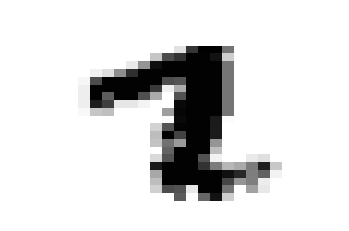

-----
Pred: 7
True:  2


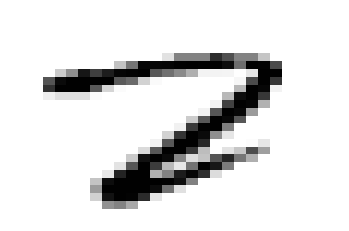

-----
Pred: 9
True:  8


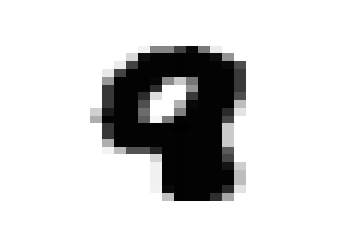

-----
Pred: 5
True:  6


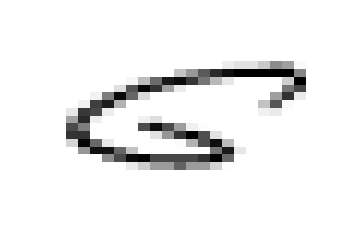

-----
Pred: 4
True:  9


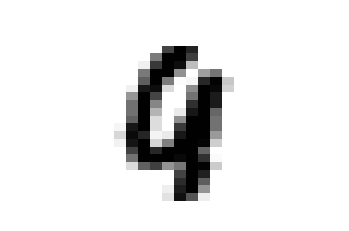

-----
Pred: 5
True:  9


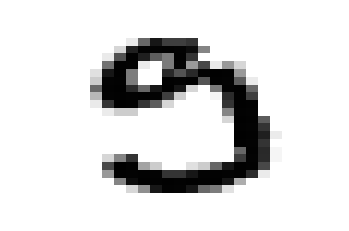

-----
Pred: 1
True:  7


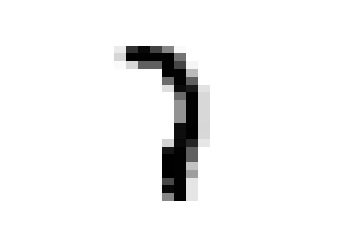

-----
Pred: 7
True:  5


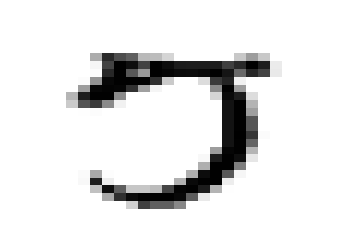

-----
Pred: 7
True:  3


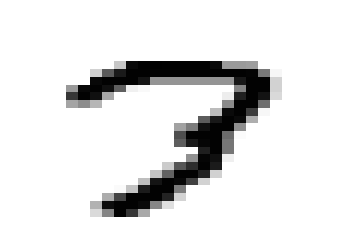

-----
Pred: 7
True:  0


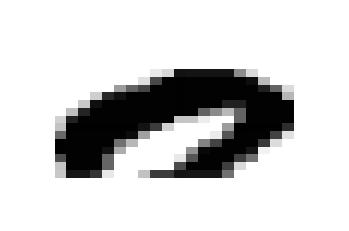

-----
Pred: 7
True:  2


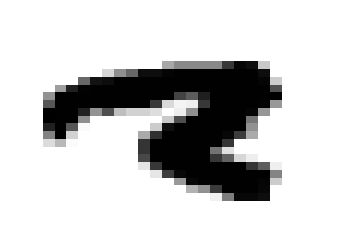

-----
Pred: 4
True:  9


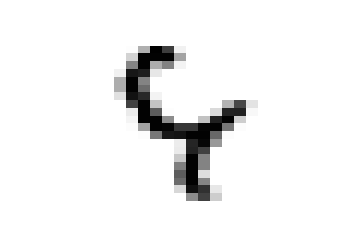

-----
Pred: 0
True:  6


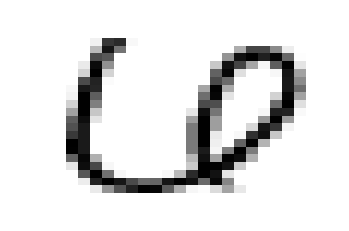

-----
Pred: 9
True:  4


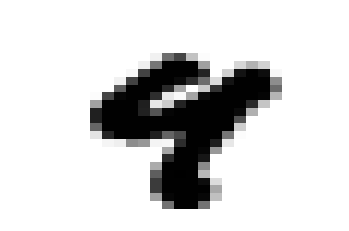

-----
Pred: 1
True:  6


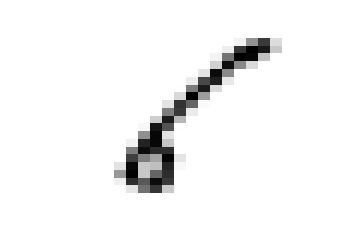

-----
Pred: 4
True:  9


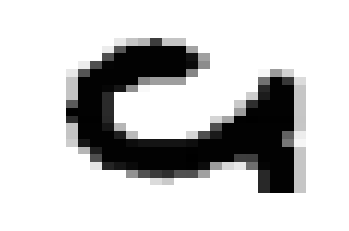

-----
Pred: 4
True:  9


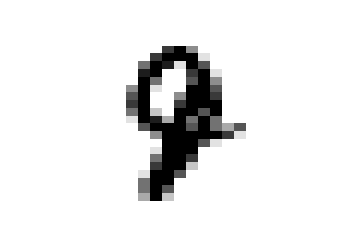

-----
Pred: 0
True:  2


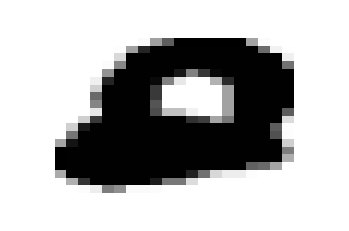

-----
Pred: 4
True:  2


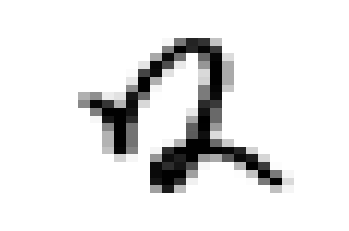

-----
Pred: 3
True:  5


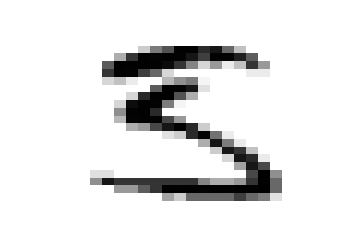

-----
Pred: 1
True:  6


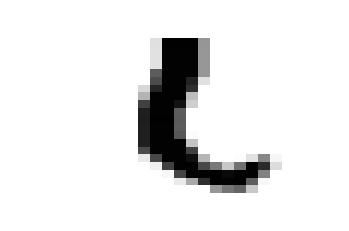

-----
Pred: 0
True:  8


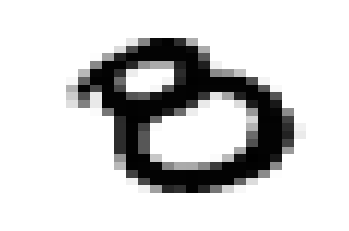

-----
Pred: 2
True:  3


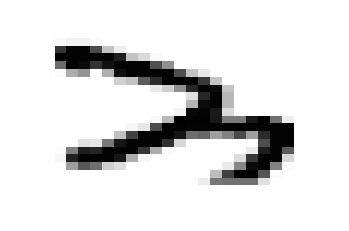

-----
Pred: 5
True:  9


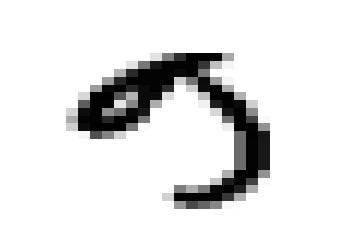

-----
Pred: 9
True:  7


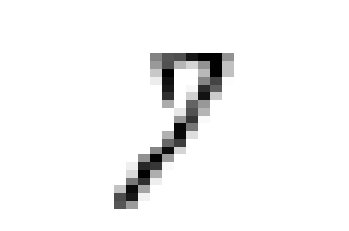

-----
Pred: 0
True:  6


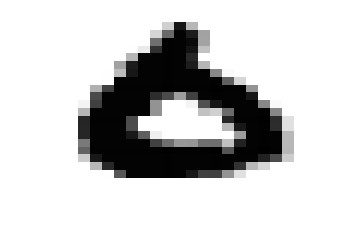

-----
Pred: 4
True:  6


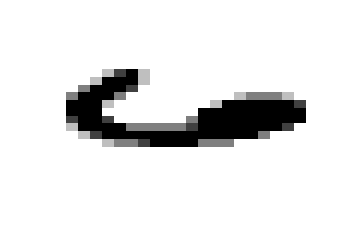

-----
Pred: 0
True:  5


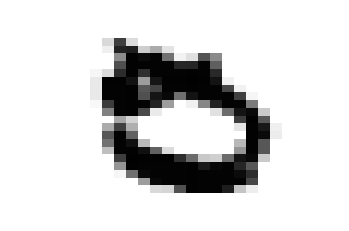

-----
Pred: 8
True:  6


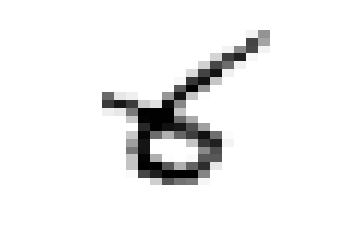

-----
Pred: 8
True:  9


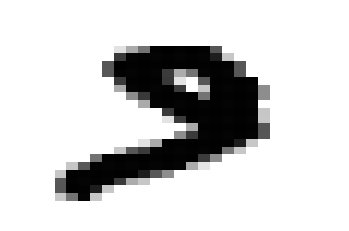

-----
Pred: 7
True:  2


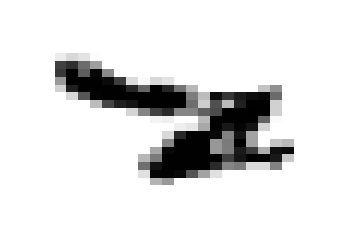

-----
Pred: 7
True:  1


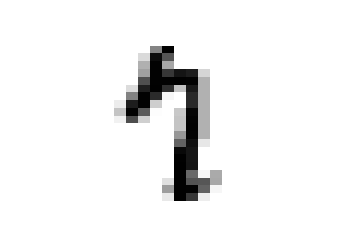

-----
Pred: 7
True:  2


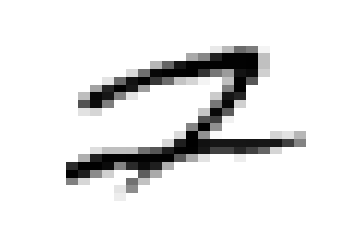

-----
Pred: 1
True:  6


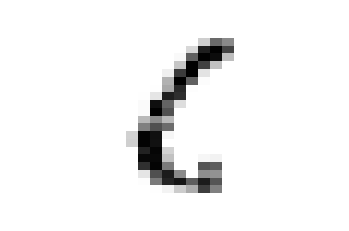

-----
Pred: 5
True:  3


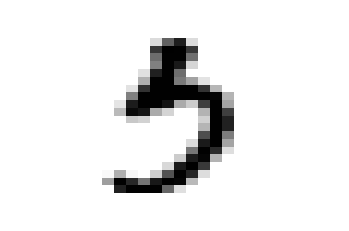

-----
Pred: 4
True:  9


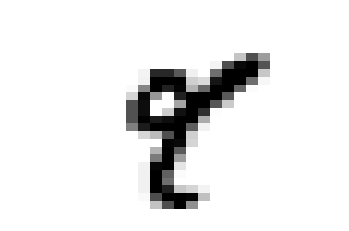

-----
Pred: 4
True:  9


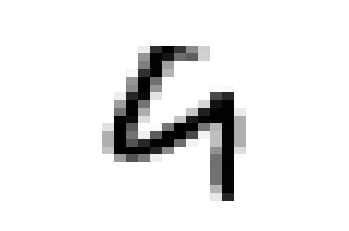

-----
Pred: 3
True:  5


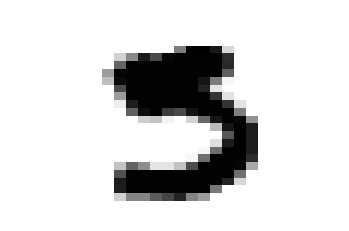

-----
Pred: 7
True:  9


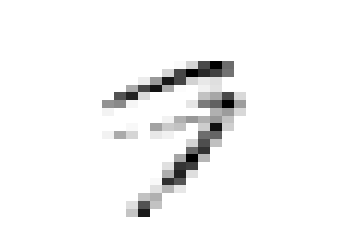

-----
Pred: 1
True:  7


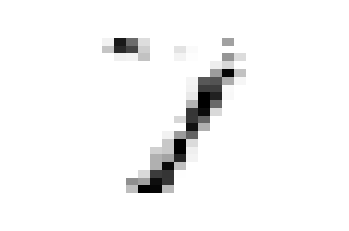

-----
Pred: 7
True:  0


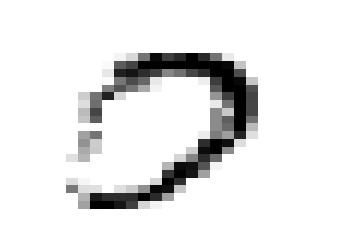

-----
Pred: 2
True:  8


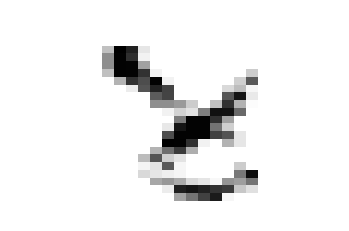

-----
Pred: 8
True:  0


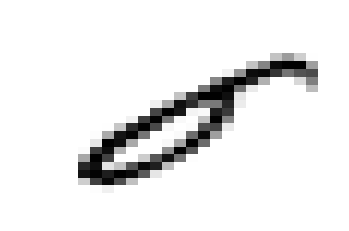

-----
Pred: 5
True:  8


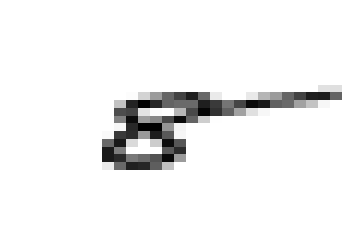

-----
Pred: 7
True:  9


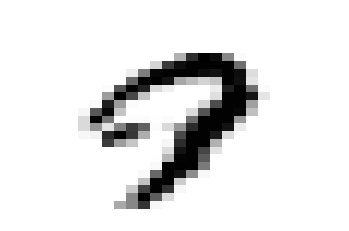

-----
Pred: 7
True:  9


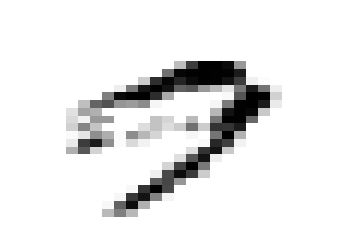

-----
Pred: 7
True:  2


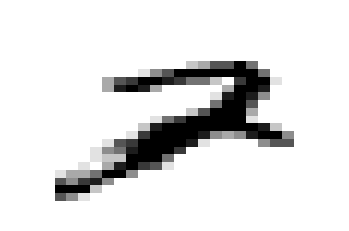

-----
Pred: 6
True:  5


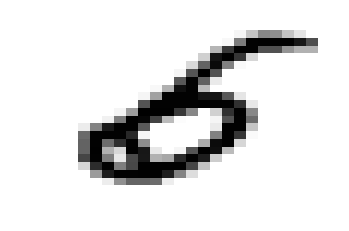

-----
Pred: 7
True:  2


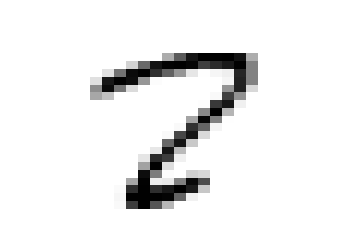

-----


In [ ]:
wrong_indices = np.where(pred2!=y_test)[0]
print("Number of misclassifications:", len(wrong_indices))
for i in wrong_indices:
  sample = x_test[i]
  print("Pred:", pred2[i])
  print("True: ", y_test[i])
  number = sample.squeeze(2)
  plt.pcolor( 1-number[::-1], cmap = 'gray' ); #flip rows from back to front with ::-1
  plt.axis('off')
  plt.show()
  plt.close()

  print("-----")
  

In [ ]:
  full_train_model.save('final_network')

In [ ]:
!zip -r final_network.zip final_network

  adding: final_network/ (stored 0%)
  adding: final_network/variables/ (stored 0%)
  adding: final_network/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: final_network/variables/variables.index (deflated 68%)
  adding: final_network/keras_metadata.pb (deflated 93%)
  adding: final_network/assets/ (stored 0%)
  adding: final_network/saved_model.pb (deflated 89%)


In [ ]:
from google.colab import files
files.download("final_network.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r network.zip network

  adding: network/ (stored 0%)
  adding: network/assets/ (stored 0%)
  adding: network/variables/ (stored 0%)
  adding: network/variables/variables.index (deflated 68%)
  adding: network/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: network/saved_model.pb (deflated 89%)
  adding: network/keras_metadata.pb (deflated 93%)


In [ ]:
from google.colab import files
files.download("network.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>